# Midterm Project Requirement
Apply CNN and ResNet models on this [dataset of Chest X-ray to detect COVID-19](https://www.kaggle.com/pranavraikokte/covid19-image-dataset/).  Build models that make use of batch normalization and  regularization as needed. Compare at least three different configurations of each, one of which should use a pre-trained model.
## About the Dataset
The [dataset](https://www.kaggle.com/pranavraikokte/covid19-image-dataset/) is helping Deep Learning and AI Enthusiasts to contribute to improving COVID-19 detection using just Chest X-rays.

The content is a simple directory structure branched into test and train and further branched into the respective 3 classes which contains the images. It contains around 137 cleaned images of COVID-19 and 317 in total containing Viral Pneumonia and Normal Chest X-Rays structured into the test and train directories.

Acknowledgements: The University of Montreal for releasing the images.

The inspiration is to help the medical and researcher community by sharing my work and encourage them to contribute extensively.
<br />
<center>
<img src= "Covid19-dataset\test\Covid\0100.jpeg" width = 500 />
</center>

## Part 1: Data Preprocessing
Before we apply our CNN and ResNet models, we should make the images to the same size and same suffix. This part is mainly about image preprocessing.
### 1.1 Changing Suffix of Images
Changing all the images' suffix to .jpeg.

In [1]:
import os
 
# The root directory of the image you want to change
rootdir = r"E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\test\Covid"
# Get a list of file names in a directory
files = os.listdir(rootdir)
 
# Process each filename in the filename list
for filename in files:
    portion = os.path.splitext(filename)  # portion is a list separated by name and suffix, os.path.splitext()separate filename and extension
    if portion[1] != ".jpeg":  #If it is not jpeg, change the suffix
        newname = portion[0]+".jpeg"  # new suffix to change  # changed new name
        print(filename)    # print out the filename to be changed
        os.chdir(rootdir)  # Modify work path
        os.rename(filename,newname)
# Want to change the root directory where the image is located

rootdir = r"E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Covid"
# Get a list of file names in a directory
files = os.listdir(rootdir)
 
#Process each filename in the filename list
for filename in files:
    portion = os.path.splitext(filename)  
    if portion[1] != ".jpeg":  
        newname = portion[0]+".jpeg" 
        print(filename)    
        os.chdir(rootdir) 
        os.rename(filename,newname)

### 1.2 Resize all the image size to 128x128

In [2]:
from PIL import Image
import os.path
import glob

def convertjpeg(file,outdir,width = 128,height = 128):
    img=Image.open(file)
    try:
        new_img = img.resize((width, height), Image.BILINEAR)
        if new_img.mode == 'P':
            new_img = new_img.convert("RGB")
        if new_img.mode == 'RGBA':
            new_img = new_img.convert("RGB")
        new_img.save(os.path.join(outdir, os.path.basename(file)))
    except Exception as e:
        print(e)


input_paths = [r"E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\test\Covid\*.jpeg",
         r"E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\test\Normal\*.jpeg",
         r"E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\test\Viral Pneumonia\*.jpeg",
         r"E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Covid\*.jpeg",
         r"E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Normal\*.jpeg",
         r"E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Viral Pneumonia\*.jpeg"]

output_paths = [r"E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\cleaned_data\test\Covid",
                r"E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\cleaned_data\test\Normal",
                r"E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\cleaned_data\test\Viral Pneumonia",
                r"E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\cleaned_data\train\Covid",
                r"E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\cleaned_data\train\Normal",
                r"E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\cleaned_data\train\Viral Pneumonia"]
for i in range(len(input_paths)):
    for file in glob.glob(input_paths[i]):
        print(file)
        convertjpeg(file,output_paths[i])

E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\test\Covid\0100.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\test\Covid\0102.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\test\Covid\0105.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\test\Covid\0106.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\test\Covid\0108.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\test\Covid\0111.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\test\Covid\0112.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\test\Covid\0113.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\test\Covid\0115.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\test\Covid\0118.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_

E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Covid\031.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Covid\032.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Covid\033.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Covid\039.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Covid\04.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Covid\040.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Covid\041.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Covid\042.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Covid\043.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Covid\044.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_P

E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Normal\013.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Normal\014.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Normal\015.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Normal\016.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Normal\017.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Normal\018.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Normal\019.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Normal\02.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Normal\020.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Normal\021.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI

E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Viral Pneumonia\036.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Viral Pneumonia\037.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Viral Pneumonia\038.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Viral Pneumonia\04.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Viral Pneumonia\041.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Viral Pneumonia\042.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Viral Pneumonia\043.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Viral Pneumonia\044.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\Covid19-dataset\train\Viral Pneumonia\045.jpeg
E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Projec

### 1.3 Loading all images in a numpy array with labels

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import array_to_img
from numpy import asarray
%matplotlib inline

In [4]:
#img = Image.open('Sample.png')
#numpydata = asarray(img)

def load_image_from_folder(path, basewidth, hsize):
    # creating temp array
    image_array = []
    labels = []
    i = 0
    # directory walking started
    for subdir, dirs, files in os.walk(path):
        for file in files:
            if file != []:
                # trying to get path of each images
                path_updated = os.path.join(subdir, file)
                # fetching lables from directory names
                label = subdir.split('\\')[-1]
                if label == 'Covid':
                    labels.append(0)
                if label == 'Normal':
                    labels.append(1)
                if label == 'Viral Pneumonia':
                    labels.append(2)
                # Converting image & resizing it
                img = Image.open(path_updated).convert('L')
                img = img.resize((basewidth, hsize), Image.ANTIALIAS)
                frame = asarray(img)
                # appending array of image in temp array
                image_array.append(frame)
  
    # Now i have to convert this images to array channel format which can be done using zero matrix
    # creating a dummy zero matrix of same shape with single channel
    
    image_array1 = np.zeros(shape=(np.array(image_array).shape[0], hsize, basewidth, 1))
    for i in range(np.array(image_array).shape[0]):
        # finally each sub matrix will be replaced with respective images array
        image_array1[i, :, :, 0] = image_array[i]
    
    return image_array1, np.array(labels)

train_images, train_labels = load_image_from_folder(r"E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\cleaned_data\train", 128, 128)
test_images, test_labels = load_image_from_folder(r"E:\NEU\Courses\22Spring\INFO7375_ST in AI\Midterm_Project\cleaned_data\test", 128, 128)

### 1.4 Normalize pixel values to be between 0 and 1

In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0

## Part 2: CNNs
In this part, we are going to build 3 CNN models using different structures, methods and hyperparameters.
### 2.1 model_CNN_v1
The first model I built is a very basic CNN model with common structures with Maxpooling layers. 

Average pooling method smooths out the image and hence the sharp features may not be identified when this pooling method is used.
Max pooling selects the brighter pixels from the image. It is useful when the background of the image is dark and we are interested in only the lighter pixels of the image.

In [6]:
import visualkeras
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Input
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from sklearn import preprocessing
from keras.regularizers import l2
from keras.models import Model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# initiate hyper-parameters
batch_size = 128
epochs = 300
num_classes = 3
data_augmentation = True
# initiate optimizer
opt = tf.keras.optimizers.RMSprop(learning_rate = 0.001)

In [8]:
from keras import backend as K
K.clear_session()

model_CNN_v1 = Sequential()
model_CNN_v1.add(Conv2D(32, (5, 5), padding = 'same',  # 32，(5,5) is the number and size of the convolution kernel
                 input_shape = train_images.shape[1:]))  # The first layer needs to indicate the size of the image
model_CNN_v1.add(Activation('relu'))
model_CNN_v1.add(Conv2D(32, (5, 5))) # Convolutional layer
model_CNN_v1.add(Activation('relu'))
#model_CNN_v1.BatchNormalization()
model_CNN_v1.add(MaxPooling2D(pool_size=(2, 2))) # Pooling layer

model_CNN_v1.add(Conv2D(64, (5, 5), padding='same')) # Convolutional layer
model_CNN_v1.add(Activation('relu'))
model_CNN_v1.add(Conv2D(64, (5, 5))) # Convolutional layer
model_CNN_v1.add(Activation('relu'))
#model_CNN_v1.BatchNormalization()
model_CNN_v1.add(MaxPooling2D(pool_size=(2, 2))) # Pooling layer

model_CNN_v1.add(Flatten())
model_CNN_v1.add(Dense(512)) # Fully connected layer
model_CNN_v1.add(Activation('relu'))
model_CNN_v1.add(Dropout(0.33)) # Dropout layer
model_CNN_v1.add(Dense(num_classes)) # Output layer
model_CNN_v1.add(Activation('softmax'))



# Let's compile the model  
model_CNN_v1.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = opt,
              metrics = ['sparse_categorical_accuracy'])

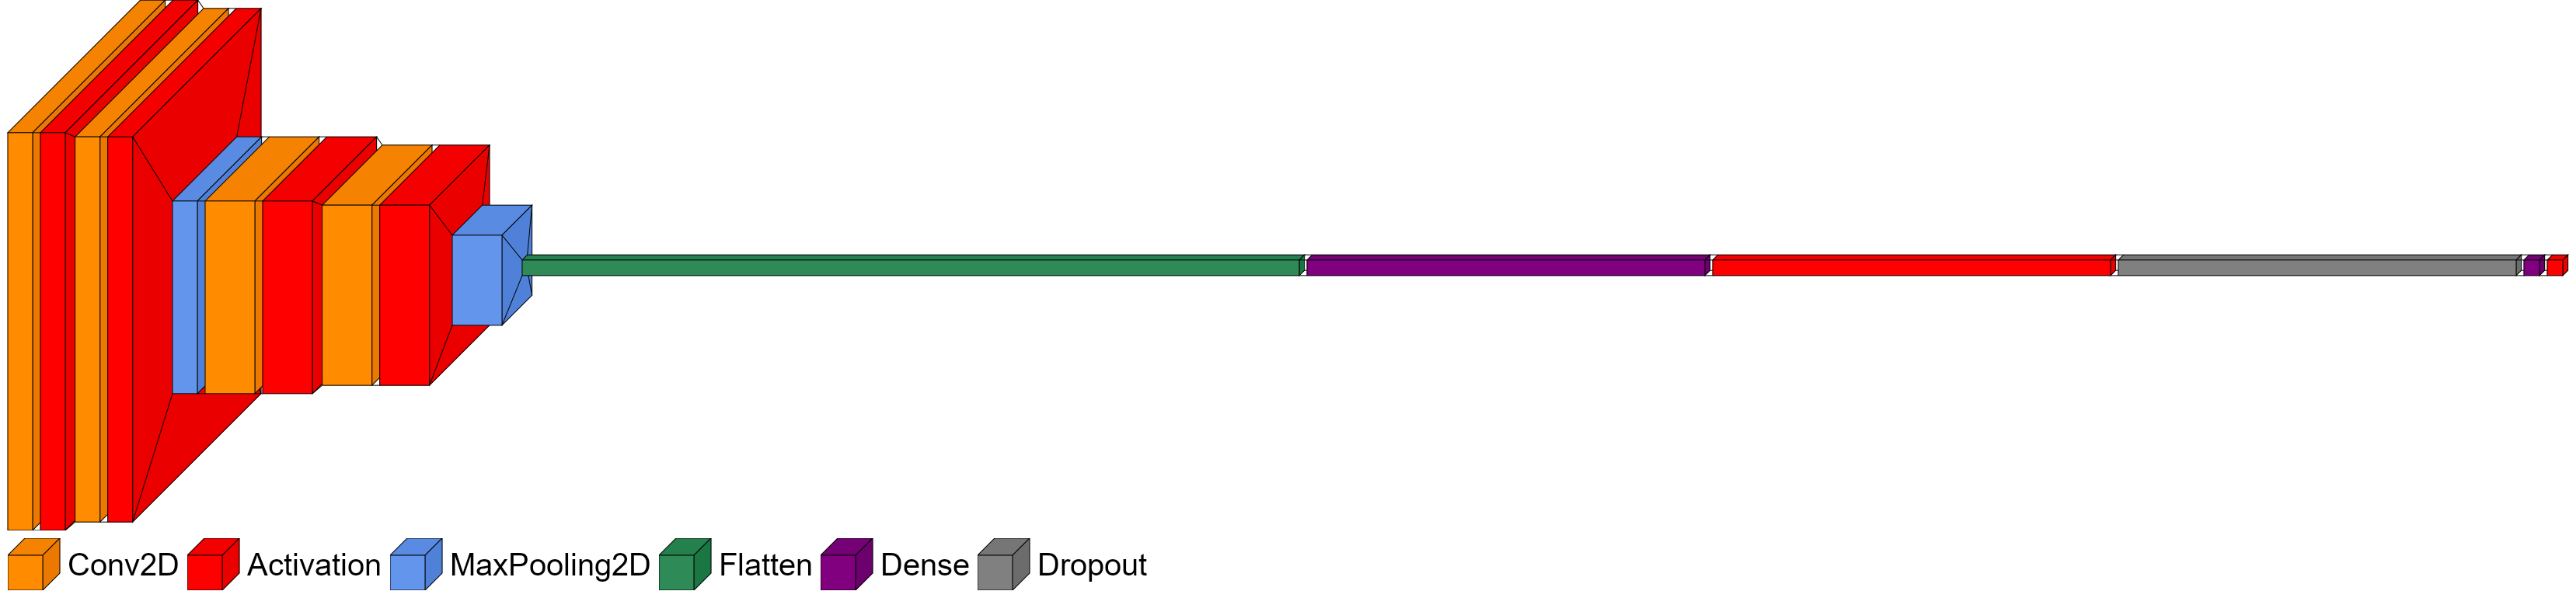

In [9]:
from PIL import ImageFont 
from collections import defaultdict

font = ImageFont.truetype("arial.ttf", 40)

color_map = defaultdict(dict)

color_map[Conv2D]['fill'] = 'darkorange'
color_map[Activation]['fill'] = 'red'
color_map[MaxPooling2D]['fill'] = 'cornflowerblue'
color_map[Dropout]['fill'] = 'grey'
color_map[Dense]['fill'] = 'purple'
color_map[Flatten]['fill'] = 'seagreen'


visualkeras.layered_view(model_CNN_v1, legend = True, font = font, scale_xy = 4, scale_z = 1, max_z=1000,
                         color_map = color_map) 

In [10]:
model_CNN_v1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      832       
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      25632     
                                                                 
 activation_1 (Activation)   (None, 124, 124, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        51264     
                                                        

In [11]:
# Data_augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    # Zifeng Edited
    history_CNN_v1 = model_CNN_v1.fit(train_images, train_labels,
              batch_size = batch_size,
              epochs = epochs,
              validation_data = (test_images, test_labels),
              shuffle = True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(train_images)

    # Fit the model on the batches generated by datagen.flow().
    # Zifeng Edited
    history_CNN_v1 = model_CNN_v1.fit(datagen.flow(train_images, train_labels, batch_size = batch_size),
                        validation_data = (test_images, test_labels),
                        epochs = epochs, verbose = 1, workers = 10)

Using real-time data augmentation.
Epoch 1/300
2/2 [==============================] - 8s 3s/step - loss: 38.3440 - sparse_categorical_accuracy: 0.3546 - val_loss: 4.1507 - val_sparse_categorical_accuracy: 0.3030
Epoch 2/300
2/2 [==============================] - 0s 154ms/step - loss: 2.7007 - sparse_categorical_accuracy: 0.3625 - val_loss: 1.9073 - val_sparse_categorical_accuracy: 0.3333
Epoch 3/300
2/2 [==============================] - 0s 148ms/step - loss: 1.5651 - sparse_categorical_accuracy: 0.3028 - val_loss: 1.1031 - val_sparse_categorical_accuracy: 0.3030
Epoch 4/300
2/2 [==============================] - 0s 159ms/step - loss: 1.0914 - sparse_categorical_accuracy: 0.3745 - val_loss: 1.0790 - val_sparse_categorical_accuracy: 0.3939
Epoch 5/300
2/2 [==============================] - 0s 148ms/step - loss: 1.0687 - sparse_categorical_accuracy: 0.4502 - val_loss: 1.0642 - val_sparse_categorical_accuracy: 0.3939
Epoch 6/300
2/2 [==============================] - 0s 156ms/step - loss:

2/2 [==============================] - 0s 156ms/step - loss: 0.3602 - sparse_categorical_accuracy: 0.8685 - val_loss: 0.3855 - val_sparse_categorical_accuracy: 0.8182
Epoch 92/300
2/2 [==============================] - 0s 151ms/step - loss: 0.3350 - sparse_categorical_accuracy: 0.8884 - val_loss: 0.4819 - val_sparse_categorical_accuracy: 0.7727
Epoch 93/300
2/2 [==============================] - 0s 152ms/step - loss: 0.3462 - sparse_categorical_accuracy: 0.8845 - val_loss: 0.7005 - val_sparse_categorical_accuracy: 0.6970
Epoch 94/300
2/2 [==============================] - 0s 148ms/step - loss: 0.3660 - sparse_categorical_accuracy: 0.8645 - val_loss: 0.4551 - val_sparse_categorical_accuracy: 0.8030
Epoch 95/300
2/2 [==============================] - 0s 155ms/step - loss: 0.2716 - sparse_categorical_accuracy: 0.9084 - val_loss: 0.4242 - val_sparse_categorical_accuracy: 0.8333
Epoch 96/300
2/2 [==============================] - 0s 150ms/step - loss: 0.2546 - sparse_categorical_accuracy: 0

2/2 [==============================] - 0s 147ms/step - loss: 0.1005 - sparse_categorical_accuracy: 0.9562 - val_loss: 0.3512 - val_sparse_categorical_accuracy: 0.8939
Epoch 182/300
2/2 [==============================] - 0s 151ms/step - loss: 0.1271 - sparse_categorical_accuracy: 0.9482 - val_loss: 0.3557 - val_sparse_categorical_accuracy: 0.8788
Epoch 183/300
2/2 [==============================] - 0s 148ms/step - loss: 0.0658 - sparse_categorical_accuracy: 0.9721 - val_loss: 0.4681 - val_sparse_categorical_accuracy: 0.8788
Epoch 184/300
2/2 [==============================] - 0s 155ms/step - loss: 0.0670 - sparse_categorical_accuracy: 0.9721 - val_loss: 0.5576 - val_sparse_categorical_accuracy: 0.8182
Epoch 185/300
2/2 [==============================] - 0s 154ms/step - loss: 0.1202 - sparse_categorical_accuracy: 0.9641 - val_loss: 0.4353 - val_sparse_categorical_accuracy: 0.8636
Epoch 186/300
2/2 [==============================] - 0s 148ms/step - loss: 0.3723 - sparse_categorical_accura

2/2 [==============================] - 0s 144ms/step - loss: 0.0290 - sparse_categorical_accuracy: 0.9920 - val_loss: 0.1994 - val_sparse_categorical_accuracy: 0.9242
Epoch 272/300
2/2 [==============================] - 0s 158ms/step - loss: 0.0458 - sparse_categorical_accuracy: 0.9920 - val_loss: 0.1921 - val_sparse_categorical_accuracy: 0.9545
Epoch 273/300
2/2 [==============================] - 0s 147ms/step - loss: 0.0260 - sparse_categorical_accuracy: 0.9880 - val_loss: 0.1750 - val_sparse_categorical_accuracy: 0.9394
Epoch 274/300
2/2 [==============================] - 0s 146ms/step - loss: 0.0148 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.1686 - val_sparse_categorical_accuracy: 0.9394
Epoch 275/300
2/2 [==============================] - 0s 157ms/step - loss: 0.0272 - sparse_categorical_accuracy: 0.9880 - val_loss: 0.1730 - val_sparse_categorical_accuracy: 0.9545
Epoch 276/300
2/2 [==============================] - 0s 144ms/step - loss: 0.0189 - sparse_categorical_accura

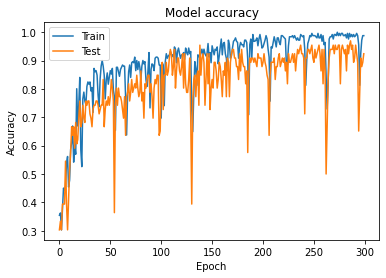

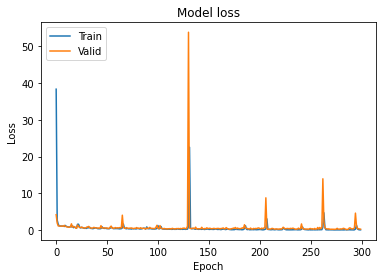

3/3 - 0s - loss: 0.2131 - sparse_categorical_accuracy: 0.9242 - 34ms/epoch - 11ms/step


In [12]:
# Plot the accuracy values of training and testing sets
plt.plot(history_CNN_v1.history['sparse_categorical_accuracy'])
plt.plot(history_CNN_v1.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the loss values for training and testing sets
plt.plot(history_CNN_v1.history['loss']) 
plt.plot(history_CNN_v1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

test_loss, test_acc = model_CNN_v1.evaluate(test_images,  test_labels, verbose = 2)

### 2.2 model_CNN_v2
In this model, I am going to add more Conv2D layers. Because the sparse_categorical_accuracy is unstable in the model_CNN_v1, I decided to use a smaller learning rate and change the optimizer from RMSprop to Adam.

In [13]:
# initiate hyper-parameters
batch_size = 128
epochs = 100
data_augmentation = True
# initiate optimizer
opt = tf.keras.optimizers.Adam(learning_rate = 0.0005)

In [14]:
K.clear_session() # Clear the memory occupied by the previous model to prevent OOM

model_CNN_v2 = Sequential()
model_CNN_v2.add(Conv2D(32, (5, 5), padding = 'same',  # 32，(5,5) is the number and size of the convolution kernel
                 input_shape = train_images.shape[1:]))  # The first layer needs to indicate the size of the image
model_CNN_v2.add(Activation('relu'))
model_CNN_v2.add(Conv2D(32, (5, 5))) # Convolutional layer
model_CNN_v2.add(Activation('relu'))
model_CNN_v2.add(MaxPooling2D(pool_size=(2, 2))) # Pooling layer

model_CNN_v2.add(Conv2D(64, (5, 5), padding='same')) # Convolutional layer
model_CNN_v2.add(Activation('relu'))
model_CNN_v2.add(Conv2D(64, (5, 5))) # Convolutional layer
model_CNN_v2.add(Activation('relu'))
model_CNN_v2.add(MaxPooling2D(pool_size=(2, 2))) # Pooling layer

model_CNN_v2.add(Conv2D(128, (5, 5), padding='same')) # Convolutional layer
model_CNN_v2.add(Activation('relu'))
model_CNN_v2.add(Conv2D(128, (5, 5))) # Convolutional layer
model_CNN_v2.add(Activation('relu'))
model_CNN_v2.add(MaxPooling2D(pool_size=(2, 2))) # Pooling layer

model_CNN_v2.add(Flatten())
model_CNN_v2.add(Dense(512)) # Fully connected layer
model_CNN_v2.add(Activation('relu'))
model_CNN_v2.add(Dropout(0.33)) # Dropout layer
model_CNN_v2.add(Dense(num_classes)) # Output layer
model_CNN_v2.add(Activation('softmax'))



# Let's compile the model  
model_CNN_v2.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = opt,
              metrics = ['sparse_categorical_accuracy'])

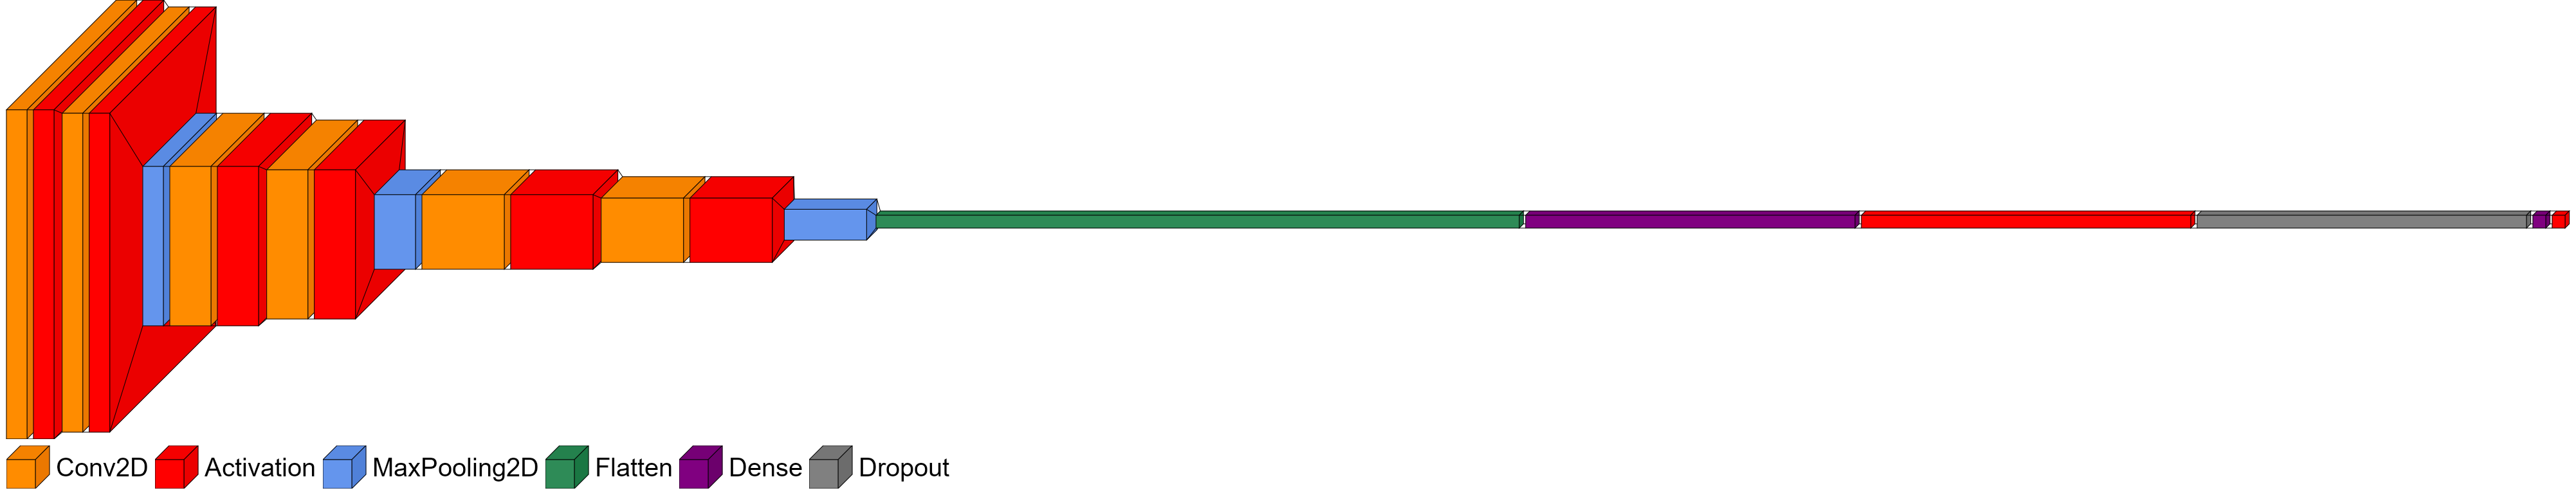

In [15]:
font = ImageFont.truetype("arial.ttf", 40)

color_map = defaultdict(dict)

color_map[Conv2D]['fill'] = 'darkorange'
color_map[Activation]['fill'] = 'red'
color_map[MaxPooling2D]['fill'] = 'cornflowerblue'
color_map[Dropout]['fill'] = 'grey'
color_map[Dense]['fill'] = 'purple'
color_map[Flatten]['fill'] = 'seagreen'


visualkeras.layered_view(model_CNN_v2, legend = True, font = font, scale_xy = 4, scale_z = 1, max_z=1000,
                         color_map = color_map) 

In [16]:
model_CNN_v2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      832       
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      25632     
                                                                 
 activation_1 (Activation)   (None, 124, 124, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        51264     
                                                        

In [17]:
# Data_augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    # Zifeng Edited
    history_CNN_v2 = model_CNN_v2.fit(train_images, train_labels,
              batch_size = batch_size,
              epochs = epochs,
              validation_data = (test_images, test_labels),
              shuffle = True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(train_images)

    # Fit the model on the batches generated by datagen.flow().
    # Zifeng Edited
    history_CNN_v2 = model_CNN_v2.fit(datagen.flow(train_images, train_labels, batch_size = batch_size),
                        validation_data = (test_images, test_labels),
                        epochs = epochs, verbose = 1, workers = 10)

Using real-time data augmentation.
Epoch 1/300
2/2 [==============================] - 3s 1s/step - loss: 1.0965 - sparse_categorical_accuracy: 0.3267 - val_loss: 1.0828 - val_sparse_categorical_accuracy: 0.4545
Epoch 2/300
2/2 [==============================] - 0s 165ms/step - loss: 1.0552 - sparse_categorical_accuracy: 0.5100 - val_loss: 1.2162 - val_sparse_categorical_accuracy: 0.3939
Epoch 3/300
2/2 [==============================] - 0s 168ms/step - loss: 1.1253 - sparse_categorical_accuracy: 0.4183 - val_loss: 1.0676 - val_sparse_categorical_accuracy: 0.3333
Epoch 4/300
2/2 [==============================] - 0s 157ms/step - loss: 1.0722 - sparse_categorical_accuracy: 0.3904 - val_loss: 1.0561 - val_sparse_categorical_accuracy: 0.6061
Epoch 5/300
2/2 [==============================] - 0s 157ms/step - loss: 1.0536 - sparse_categorical_accuracy: 0.7052 - val_loss: 1.0258 - val_sparse_categorical_accuracy: 0.6515
Epoch 6/300
2/2 [==============================] - 0s 170ms/step - loss: 

2/2 [==============================] - 0s 174ms/step - loss: 0.0604 - sparse_categorical_accuracy: 0.9721 - val_loss: 0.1311 - val_sparse_categorical_accuracy: 0.9242
Epoch 92/300
2/2 [==============================] - 0s 173ms/step - loss: 0.0625 - sparse_categorical_accuracy: 0.9721 - val_loss: 0.0792 - val_sparse_categorical_accuracy: 0.9848
Epoch 93/300
2/2 [==============================] - 0s 166ms/step - loss: 0.0674 - sparse_categorical_accuracy: 0.9761 - val_loss: 0.0652 - val_sparse_categorical_accuracy: 0.9697
Epoch 94/300
2/2 [==============================] - 0s 164ms/step - loss: 0.0566 - sparse_categorical_accuracy: 0.9841 - val_loss: 0.0717 - val_sparse_categorical_accuracy: 0.9545
Epoch 95/300
2/2 [==============================] - 0s 160ms/step - loss: 0.0566 - sparse_categorical_accuracy: 0.9641 - val_loss: 0.0565 - val_sparse_categorical_accuracy: 0.9848
Epoch 96/300
2/2 [==============================] - 0s 167ms/step - loss: 0.0462 - sparse_categorical_accuracy: 0

2/2 [==============================] - 0s 167ms/step - loss: 0.0126 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.1336 - val_sparse_categorical_accuracy: 0.9545
Epoch 182/300
2/2 [==============================] - 0s 167ms/step - loss: 0.0107 - sparse_categorical_accuracy: 0.9960 - val_loss: 0.1788 - val_sparse_categorical_accuracy: 0.9545
Epoch 183/300
2/2 [==============================] - 0s 171ms/step - loss: 0.0072 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.1765 - val_sparse_categorical_accuracy: 0.9545
Epoch 184/300
2/2 [==============================] - 0s 160ms/step - loss: 0.0130 - sparse_categorical_accuracy: 0.9920 - val_loss: 0.1640 - val_sparse_categorical_accuracy: 0.9545
Epoch 185/300
2/2 [==============================] - 0s 166ms/step - loss: 0.0077 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.1612 - val_sparse_categorical_accuracy: 0.9545
Epoch 186/300
2/2 [==============================] - 0s 157ms/step - loss: 0.0120 - sparse_categorical_accura

2/2 [==============================] - 0s 168ms/step - loss: 0.0269 - sparse_categorical_accuracy: 0.9920 - val_loss: 0.1502 - val_sparse_categorical_accuracy: 0.9394
Epoch 272/300
2/2 [==============================] - 0s 157ms/step - loss: 0.0135 - sparse_categorical_accuracy: 0.9960 - val_loss: 0.1361 - val_sparse_categorical_accuracy: 0.9545
Epoch 273/300
2/2 [==============================] - 0s 166ms/step - loss: 0.0085 - sparse_categorical_accuracy: 0.9960 - val_loss: 0.1843 - val_sparse_categorical_accuracy: 0.9394
Epoch 274/300
2/2 [==============================] - 0s 170ms/step - loss: 0.0245 - sparse_categorical_accuracy: 0.9920 - val_loss: 0.1589 - val_sparse_categorical_accuracy: 0.9697
Epoch 275/300
2/2 [==============================] - 0s 172ms/step - loss: 0.0745 - sparse_categorical_accuracy: 0.9801 - val_loss: 0.1066 - val_sparse_categorical_accuracy: 0.9697
Epoch 276/300
2/2 [==============================] - 0s 163ms/step - loss: 0.0067 - sparse_categorical_accura

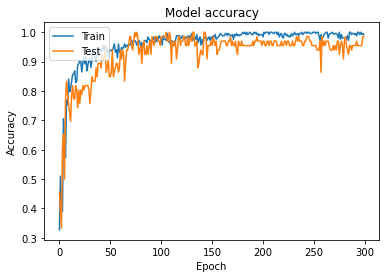

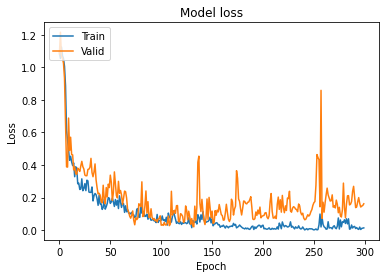

3/3 - 0s - loss: 0.1617 - sparse_categorical_accuracy: 0.9848 - 35ms/epoch - 12ms/step


In [18]:
# Plot the accuracy values of training and testing sets
plt.plot(history_CNN_v2.history['sparse_categorical_accuracy'])
plt.plot(history_CNN_v2.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the loss values for training and testing sets
plt.plot(history_CNN_v2.history['loss']) 
plt.plot(history_CNN_v2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

test_loss, test_acc = model_CNN_v2.evaluate(test_images,  test_labels, verbose = 2)

### 2.3 model_CNN_v3
In this model, I am going to add 1 more Conv2D layer and use a smaller kernel size. Also, I will add another dense layer before we get our output and run it for 300 epoches.

In [19]:
# initiate hyperparameters
batch_size = 128
epochs = 300
num_classes = 3
data_augmentation = True
# initiate optimizer
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)

In [20]:
K.clear_session() #  Clear the memory occupied by the previous model to prevent OOM

model_CNN_v3 = Sequential()
model_CNN_v3.add(Conv2D(32, (3, 3), padding = 'same',  # 32，(3, 3) is the number and size of the convolution kernel
                 input_shape = train_images.shape[1:]))  # The first layer needs to indicate the size of the image
model_CNN_v3.add(Activation('relu'))
model_CNN_v3.add(Conv2D(32, (3, 3))) # Convolutional layer
model_CNN_v3.add(Activation('relu'))
model_CNN_v3.add(Conv2D(32, (3, 3))) # Convolutional layer
model_CNN_v3.add(Activation('relu'))
model_CNN_v3.add(MaxPooling2D(pool_size=(2, 2))) # Pooling layer

model_CNN_v3.add(Conv2D(64, (3, 3), padding='same')) # Convolutional layer
model_CNN_v3.add(Activation('relu'))
model_CNN_v3.add(Conv2D(64, (3, 3))) # Convolutional layer
model_CNN_v3.add(Activation('relu'))
model_CNN_v3.add(MaxPooling2D(pool_size=(2, 2))) # Pooling layer

model_CNN_v3.add(Conv2D(128, (3, 3), padding='same')) # Convolutional layer
model_CNN_v3.add(Activation('relu'))
model_CNN_v3.add(Conv2D(128, (3, 3))) # Convolutional layer
model_CNN_v3.add(Activation('relu'))
model_CNN_v3.add(MaxPooling2D(pool_size=(2, 2))) # Pooling layer


model_CNN_v3.add(Flatten())
model_CNN_v3.add(Dense(512)) # Fully connected layers
model_CNN_v3.add(Activation('relu'))
model_CNN_v3.add(Dropout(0.33)) # Dropout layer
model_CNN_v3.add(Dense(64)) # Another dense layer
model_CNN_v3.add(Activation('relu'))
model_CNN_v3.add(Dense(num_classes)) # Output layer
model_CNN_v3.add(Activation('softmax'))



# Let's compile the model  
model_CNN_v3.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = opt,
              metrics = ['sparse_categorical_accuracy'])

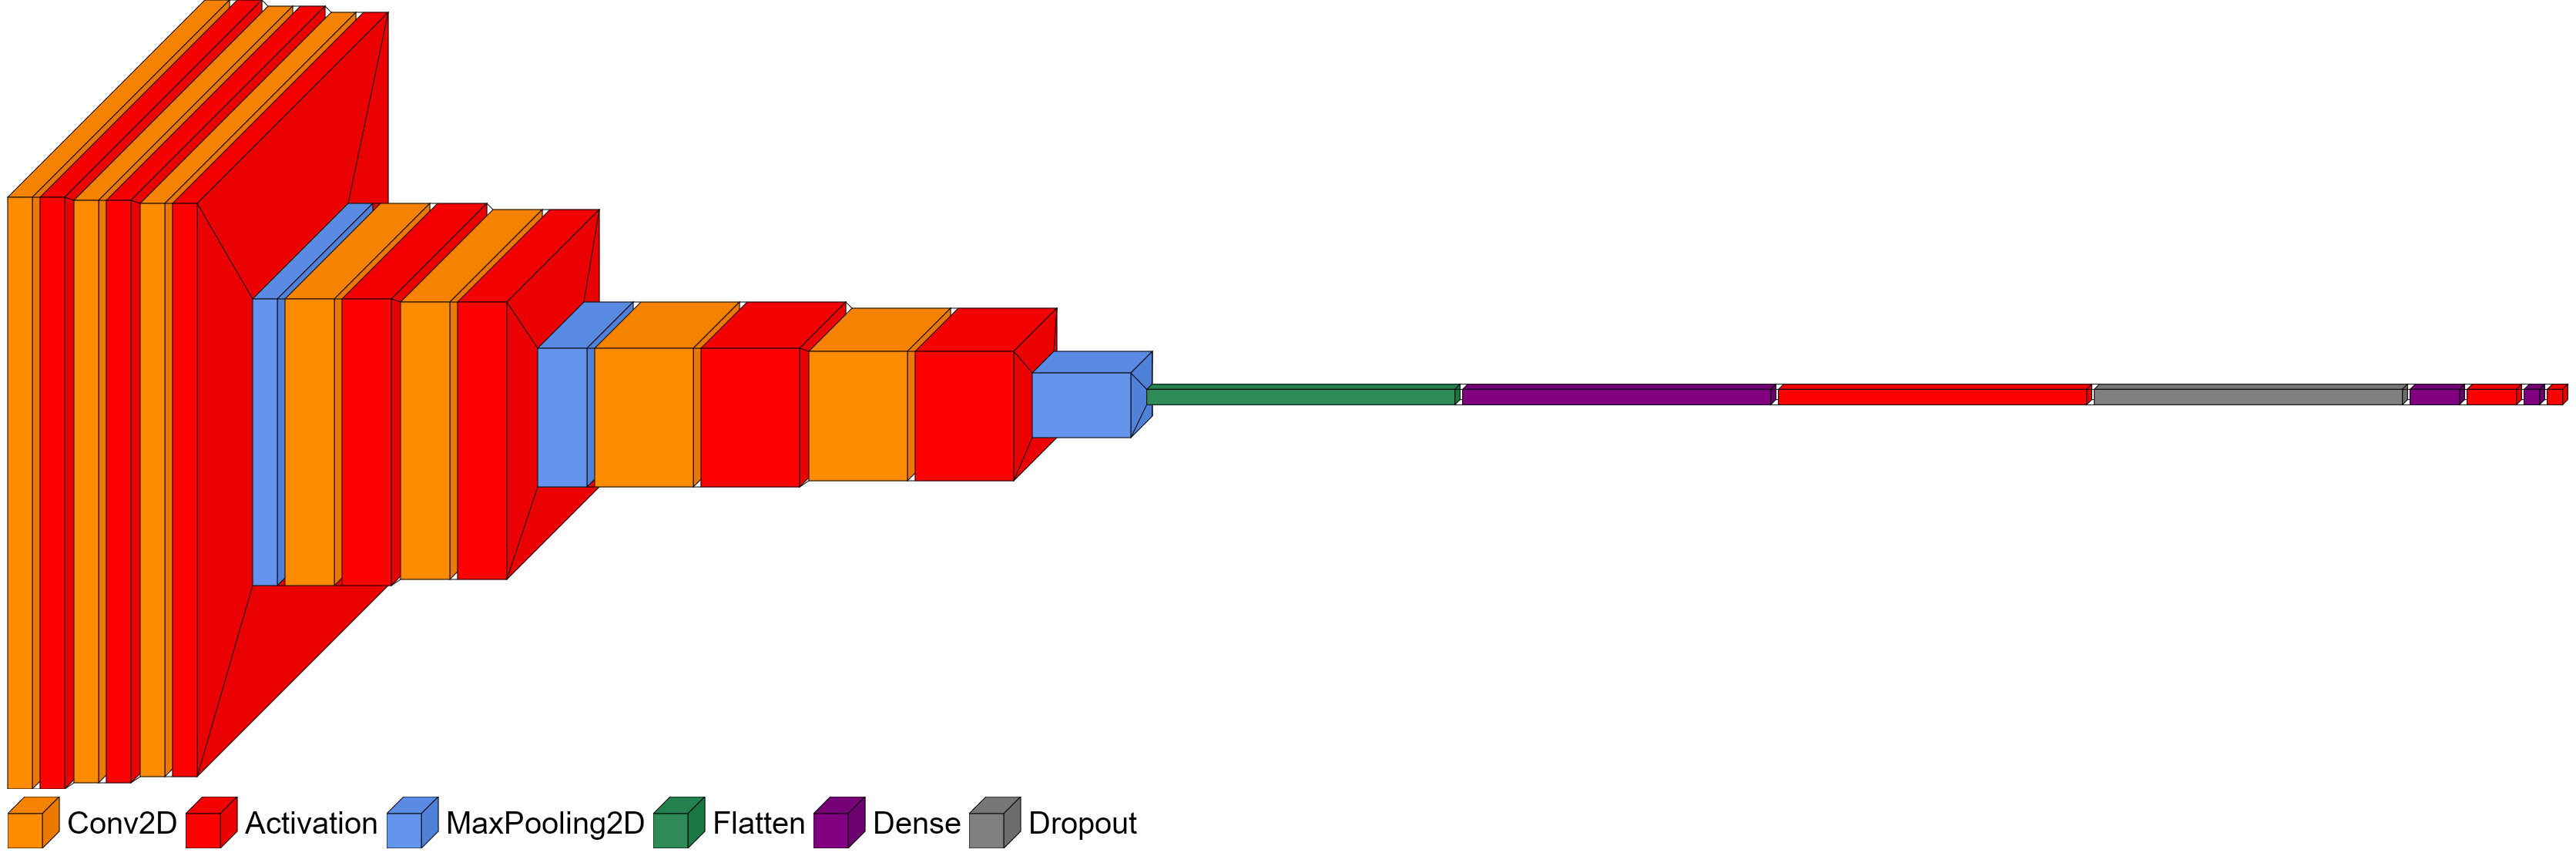

In [21]:
font = ImageFont.truetype("arial.ttf", 40)

color_map = defaultdict(dict)

color_map[Conv2D]['fill'] = 'darkorange'
color_map[Activation]['fill'] = 'red'
color_map[MaxPooling2D]['fill'] = 'cornflowerblue'
color_map[Dropout]['fill'] = 'grey'
color_map[Dense]['fill'] = 'purple'
color_map[Flatten]['fill'] = 'seagreen'


visualkeras.layered_view(model_CNN_v3, legend = True, font = font, scale_xy = 6, scale_z = 1,
                         color_map = color_map) 

In [22]:
model_CNN_v3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 126, 126, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 activation_2 (Activation)   (None, 124, 124, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0

In [23]:
# Data_augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    # Zifeng Edited
    history_CNN_v3 = model_CNN_v3.fit(train_images, train_labels,
              batch_size = batch_size,
              epochs = epochs,
              validation_data = (test_images, test_labels),
              shuffle = True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(train_images)

    # Fit the model on the batches generated by datagen.flow().
    # Zifeng Edited
    history_CNN_v3 = model_CNN_v3.fit(datagen.flow(train_images, train_labels, batch_size = batch_size),
                        validation_data = (test_images, test_labels),
                        epochs = epochs, verbose = 1, workers = 10)

Using real-time data augmentation.
Epoch 1/300
2/2 [==============================] - 6s 3s/step - loss: 1.0957 - sparse_categorical_accuracy: 0.3785 - val_loss: 1.0899 - val_sparse_categorical_accuracy: 0.3939
Epoch 2/300
2/2 [==============================] - 0s 148ms/step - loss: 1.0845 - sparse_categorical_accuracy: 0.4422 - val_loss: 1.0770 - val_sparse_categorical_accuracy: 0.3939
Epoch 3/300
2/2 [==============================] - 0s 162ms/step - loss: 1.0602 - sparse_categorical_accuracy: 0.4422 - val_loss: 1.0570 - val_sparse_categorical_accuracy: 0.3939
Epoch 4/300
2/2 [==============================] - 0s 146ms/step - loss: 1.0296 - sparse_categorical_accuracy: 0.4422 - val_loss: 1.0155 - val_sparse_categorical_accuracy: 0.3939
Epoch 5/300
2/2 [==============================] - 0s 145ms/step - loss: 1.0053 - sparse_categorical_accuracy: 0.4462 - val_loss: 0.9565 - val_sparse_categorical_accuracy: 0.6061
Epoch 6/300
2/2 [==============================] - 0s 152ms/step - loss: 

2/2 [==============================] - 0s 132ms/step - loss: 0.2157 - sparse_categorical_accuracy: 0.9044 - val_loss: 0.3054 - val_sparse_categorical_accuracy: 0.8485
Epoch 92/300
2/2 [==============================] - 0s 151ms/step - loss: 0.1680 - sparse_categorical_accuracy: 0.9323 - val_loss: 0.2962 - val_sparse_categorical_accuracy: 0.8788
Epoch 93/300
2/2 [==============================] - 0s 163ms/step - loss: 0.2152 - sparse_categorical_accuracy: 0.9084 - val_loss: 0.2979 - val_sparse_categorical_accuracy: 0.8939
Epoch 94/300
2/2 [==============================] - 0s 159ms/step - loss: 0.1708 - sparse_categorical_accuracy: 0.9402 - val_loss: 0.2846 - val_sparse_categorical_accuracy: 0.8636
Epoch 95/300
2/2 [==============================] - 0s 154ms/step - loss: 0.2195 - sparse_categorical_accuracy: 0.9084 - val_loss: 0.2858 - val_sparse_categorical_accuracy: 0.8939
Epoch 96/300
2/2 [==============================] - 0s 160ms/step - loss: 0.1766 - sparse_categorical_accuracy: 0

2/2 [==============================] - 0s 159ms/step - loss: 0.1069 - sparse_categorical_accuracy: 0.9562 - val_loss: 0.1359 - val_sparse_categorical_accuracy: 0.9242
Epoch 182/300
2/2 [==============================] - 0s 155ms/step - loss: 0.1287 - sparse_categorical_accuracy: 0.9363 - val_loss: 0.1035 - val_sparse_categorical_accuracy: 0.9394
Epoch 183/300
2/2 [==============================] - 0s 149ms/step - loss: 0.1971 - sparse_categorical_accuracy: 0.9323 - val_loss: 0.1683 - val_sparse_categorical_accuracy: 0.9394
Epoch 184/300
2/2 [==============================] - 0s 143ms/step - loss: 0.1515 - sparse_categorical_accuracy: 0.9283 - val_loss: 0.1575 - val_sparse_categorical_accuracy: 0.9091
Epoch 185/300
2/2 [==============================] - 0s 148ms/step - loss: 0.1624 - sparse_categorical_accuracy: 0.9363 - val_loss: 0.2018 - val_sparse_categorical_accuracy: 0.9091
Epoch 186/300
2/2 [==============================] - 0s 147ms/step - loss: 0.1539 - sparse_categorical_accura

2/2 [==============================] - 0s 156ms/step - loss: 0.0517 - sparse_categorical_accuracy: 0.9801 - val_loss: 0.0939 - val_sparse_categorical_accuracy: 0.9697
Epoch 272/300
2/2 [==============================] - 0s 156ms/step - loss: 0.0453 - sparse_categorical_accuracy: 0.9880 - val_loss: 0.0640 - val_sparse_categorical_accuracy: 0.9848
Epoch 273/300
2/2 [==============================] - 0s 164ms/step - loss: 0.0559 - sparse_categorical_accuracy: 0.9841 - val_loss: 0.0592 - val_sparse_categorical_accuracy: 0.9697
Epoch 274/300
2/2 [==============================] - 0s 149ms/step - loss: 0.0591 - sparse_categorical_accuracy: 0.9801 - val_loss: 0.0862 - val_sparse_categorical_accuracy: 0.9697
Epoch 275/300
2/2 [==============================] - 0s 149ms/step - loss: 0.0772 - sparse_categorical_accuracy: 0.9681 - val_loss: 0.0683 - val_sparse_categorical_accuracy: 0.9697
Epoch 276/300
2/2 [==============================] - 0s 160ms/step - loss: 0.0428 - sparse_categorical_accura

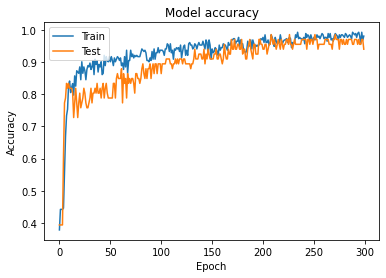

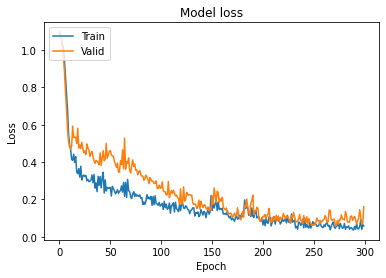

3/3 - 0s - loss: 0.1604 - sparse_categorical_accuracy: 0.9394 - 19ms/epoch - 6ms/step


In [24]:
# Plot the accuracy values of training and testing sets
plt.plot(history_CNN_v3.history['sparse_categorical_accuracy'])
plt.plot(history_CNN_v3.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the loss values for training and testing sets
plt.plot(history_CNN_v3.history['loss']) 
plt.plot(history_CNN_v3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

test_loss, test_acc = model_CNN_v3.evaluate(test_images,  test_labels, verbose = 2)

## Part 3: ResNets
In this part, we are going to build 3 ResNet models using different structures, methods and hyperparameters.
### 3.1 ResNet Version 1
In this part, we simply build a ResNet version 1 model with 5 stacks and depth = 32. Batch size change to 64

In [25]:
# Training hyper-parameters
batch_size = 64
epochs = 200
data_augmentation = True
num_classes = 3
subtract_pixel_mean = True

In [26]:
# Number of stacks
n = 5 # Zifeng Edited

# Model version
# Orig paper: version = 1 (ResNet v1), Improved ResNet: version = 2 (ResNet v2), 
version = 1

# Computed depth from supplied model parameter n

depth = n * 6 + 2

# Model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)

# Load the CIFAR10 data.
x_train, y_train, x_test, y_test = train_images, train_labels, test_images, test_labels

# Input image dimensions.
input_shape = x_train.shape[1:]

# SUBRATA added
from math import ceil
n_points = len(x_train)
steps_per_epoch = ceil(n_points / batch_size)

# If subtract pixel mean is enabled
if subtract_pixel_mean:
    x_train_mean = np.mean(x_train, axis = 0)
    x_train -= x_train_mean
    x_test -= x_train_mean

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# Convert class vectors to binary class matrices.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

x_train shape: (251, 128, 128, 1)
251 train samples
66 test samples
y_train shape: (251,)


In [27]:
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [28]:
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size = kernel_size,
                  strides = strides,
                  padding = 'same',
                  kernel_initializer = 'he_normal',
                  kernel_regularizer = l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x

In [29]:
def resnet_v1(input_shape, depth, num_classes=3):
    """ResNet Version 1 Model builder [a]

    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [30]:
K.clear_session() #  Clear the memory occupied by the previous model to prevent OOM

model_ResNet_v1 = resnet_v1(input_shape = input_shape, depth = depth)

model_ResNet_v1.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate=lr_schedule(epochs)),# Zifeng Edited
              metrics = ['accuracy'])
model_ResNet_v1.summary()
print(model_type)

# Prepare model model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'Covid_ResNet_modelv1.{epoch:03d}.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)


# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath = filepath,
                             monitor = 'val_acc',
                             verbose = 1,
                             save_best_only = True)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor = np.sqrt(0.1),
                               cooldown = 0,
                               patience = 5,
                               min_lr = 0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler]

# Run training, with or without data augmentation.
if not data_augmentation:
    print('Not using data augmentation.')
    # Zifeng Edited
    history_ResNet_v1 = model_ResNet_v1.fit(x_train, y_train,
              batch_size = batch_size,
              epochs = epochs,
              validation_data = (x_test, y_test),
              shuffle = True,
              callbacks = callbacks)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    # Zifeng Edited
    history_ResNet_v1 = model_ResNet_v1.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data = (x_test, y_test),
                        epochs = epochs, verbose = 1, workers = 10,
                        steps_per_epoch = steps_per_epoch, # SUBRATA added
                        callbacks = callbacks)

# Score trained model.
scores = model_ResNet_v1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Learning rate:  5e-07
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                       

4/4 [==============================] - 5s 613ms/step - loss: 1.1724 - accuracy: 0.6096 - val_loss: 106.7972 - val_accuracy: 0.3030 - lr: 0.0010
Learning rate:  0.001
Epoch 2/200
4/4 [==============================] - 1s 222ms/step - loss: 0.6935 - accuracy: 0.8327 - val_loss: 28.1245 - val_accuracy: 0.3182 - lr: 0.0010
Learning rate:  0.001
Epoch 3/200
4/4 [==============================] - 1s 229ms/step - loss: 0.5644 - accuracy: 0.8765 - val_loss: 8.7501 - val_accuracy: 0.3788 - lr: 0.0010
Learning rate:  0.001
Epoch 4/200
4/4 [==============================] - 1s 225ms/step - loss: 0.5200 - accuracy: 0.8924 - val_loss: 6.1020 - val_accuracy: 0.3636 - lr: 0.0010
Learning rate:  0.001
Epoch 5/200
4/4 [==============================] - 1s 224ms/step - loss: 0.4106 - accuracy: 0.9323 - val_loss: 3.5888 - val_accuracy: 0.3636 - lr: 0.0010
Learning rate:  0.001
Epoch 6/200
4/4 [==============================] - 1s 225ms/step - loss: 0.3900 - accuracy: 0.9522 - val_loss: 1.5977 - val_accur

4/4 [==============================] - 1s 226ms/step - loss: 0.2948 - accuracy: 0.9880 - val_loss: 5.8150 - val_accuracy: 0.3939 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 26/200
4/4 [==============================] - 1s 229ms/step - loss: 0.3194 - accuracy: 0.9761 - val_loss: 4.9044 - val_accuracy: 0.3939 - lr: 0.0010
Learning rate:  0.001
Epoch 27/200
4/4 [==============================] - 1s 224ms/step - loss: 0.2745 - accuracy: 0.9920 - val_loss: 3.8729 - val_accuracy: 0.4091 - lr: 0.0010
Learning rate:  0.001
Epoch 28/200
4/4 [==============================] - 1s 225ms/step - loss: 0.2778 - accuracy: 0.9920 - val_loss: 3.8217 - val_accuracy: 0.4091 - lr: 0.0010
Learning rate:  0.001
Epoch 29/200
4/4 [==============================] - 1s 225ms/step - loss: 0.2920 - accuracy: 0.9841 - val_loss: 5.1126 - val_accuracy: 0.3939 - lr: 0.0010
Learning rate:  0.001
Epoch 30/200
4/4 [==============================] - 1s 223ms/step - loss: 0.2671 - accuracy: 0.9920 - val_loss: 5.4584 - val

Learning rate:  0.001
Epoch 50/200
4/4 [==============================] - 1s 221ms/step - loss: 0.2644 - accuracy: 0.9880 - val_loss: 11.7951 - val_accuracy: 0.3939 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 51/200
4/4 [==============================] - 1s 221ms/step - loss: 0.2578 - accuracy: 0.9920 - val_loss: 9.4711 - val_accuracy: 0.3939 - lr: 0.0010
Learning rate:  0.001
Epoch 52/200
4/4 [==============================] - 1s 224ms/step - loss: 0.2551 - accuracy: 0.9960 - val_loss: 6.2235 - val_accuracy: 0.4242 - lr: 0.0010
Learning rate:  0.001
Epoch 53/200
4/4 [==============================] - 1s 223ms/step - loss: 0.2682 - accuracy: 0.9841 - val_loss: 5.8446 - val_accuracy: 0.4242 - lr: 0.0010
Learning rate:  0.001
Epoch 54/200
4/4 [==============================] - 1s 225ms/step - loss: 0.2923 - accuracy: 0.9880 - val_loss: 4.6806 - val_accuracy: 0.4545 - lr: 0.0010
Learning rate:  0.001
Epoch 55/200
4/4 [==============================] - 1s 220ms/step - loss: 0.3203 - accur

4/4 [==============================] - 1s 250ms/step - loss: 0.2335 - accuracy: 1.0000 - val_loss: 3.1381 - val_accuracy: 0.5758 - lr: 0.0010
Learning rate:  0.001
Epoch 75/200
4/4 [==============================] - 1s 257ms/step - loss: 0.2417 - accuracy: 0.9920 - val_loss: 2.4745 - val_accuracy: 0.6364 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 76/200
4/4 [==============================] - 1s 242ms/step - loss: 0.2440 - accuracy: 0.9960 - val_loss: 2.2771 - val_accuracy: 0.6515 - lr: 0.0010
Learning rate:  0.001
Epoch 77/200
4/4 [==============================] - 1s 251ms/step - loss: 0.2370 - accuracy: 1.0000 - val_loss: 1.5128 - val_accuracy: 0.7424 - lr: 0.0010
Learning rate:  0.001
Epoch 78/200
4/4 [==============================] - 1s 252ms/step - loss: 0.2320 - accuracy: 1.0000 - val_loss: 1.2226 - val_accuracy: 0.7121 - lr: 0.0010
Learning rate:  0.001
Epoch 79/200
4/4 [==============================] - 1s 225ms/step - loss: 0.2358 - accuracy: 1.0000 - val_loss: 1.2307 - val

Learning rate:  0.0001
Epoch 99/200
4/4 [==============================] - 1s 232ms/step - loss: 0.2271 - accuracy: 1.0000 - val_loss: 0.8209 - val_accuracy: 0.9091 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 100/200
4/4 [==============================] - 1s 237ms/step - loss: 0.2282 - accuracy: 1.0000 - val_loss: 0.8029 - val_accuracy: 0.9091 - lr: 3.1623e-05
Learning rate:  0.0001
Epoch 101/200
4/4 [==============================] - 1s 230ms/step - loss: 0.2286 - accuracy: 1.0000 - val_loss: 0.7821 - val_accuracy: 0.9242 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 102/200
4/4 [==============================] - 1s 222ms/step - loss: 0.2304 - accuracy: 1.0000 - val_loss: 0.7481 - val_accuracy: 0.9242 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 103/200
4/4 [==============================] - 1s 226ms/step - loss: 0.2279 - accuracy: 1.0000 - val_loss: 0.7196 - val_accuracy: 0.9242 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 104/200
4/4 [==============================] - 1s 259ms/s

4/4 [==============================] - 1s 224ms/step - loss: 0.2263 - accuracy: 1.0000 - val_loss: 0.4725 - val_accuracy: 0.9394 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 124/200
4/4 [==============================] - 1s 223ms/step - loss: 0.2266 - accuracy: 1.0000 - val_loss: 0.4616 - val_accuracy: 0.9394 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 125/200
4/4 [==============================] - 1s 222ms/step - loss: 0.2269 - accuracy: 1.0000 - val_loss: 0.4515 - val_accuracy: 0.9394 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 126/200
4/4 [==============================] - 1s 222ms/step - loss: 0.2261 - accuracy: 1.0000 - val_loss: 0.4416 - val_accuracy: 0.9394 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 127/200
4/4 [==============================] - 1s 222ms/step - loss: 0.2259 - accuracy: 1.0000 - val_loss: 0.4325 - val_accuracy: 0.9394 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 128/200
4/4 [==============================] - 1s 226ms/step - loss: 0.2262 - accuracy: 1.0000 - v

4/4 [==============================] - 1s 232ms/step - loss: 0.2255 - accuracy: 1.0000 - val_loss: 0.3297 - val_accuracy: 0.9394 - lr: 5.0000e-07
Learning rate:  1e-06
Epoch 172/200
4/4 [==============================] - 1s 224ms/step - loss: 0.2288 - accuracy: 1.0000 - val_loss: 0.3302 - val_accuracy: 0.9394 - lr: 1.0000e-06
Learning rate:  1e-06
Epoch 173/200
4/4 [==============================] - 1s 227ms/step - loss: 0.2259 - accuracy: 1.0000 - val_loss: 0.3305 - val_accuracy: 0.9394 - lr: 1.0000e-06
Learning rate:  1e-06
Epoch 174/200
4/4 [==============================] - 1s 227ms/step - loss: 0.2262 - accuracy: 1.0000 - val_loss: 0.3311 - val_accuracy: 0.9394 - lr: 1.0000e-06
Learning rate:  1e-06
Epoch 175/200
4/4 [==============================] - 1s 223ms/step - loss: 0.2259 - accuracy: 1.0000 - val_loss: 0.3314 - val_accuracy: 0.9394 - lr: 1.0000e-06
Learning rate:  1e-06
Epoch 176/200
4/4 [==============================] - 1s 228ms/step - loss: 0.2262 - accuracy: 1.0000 - v

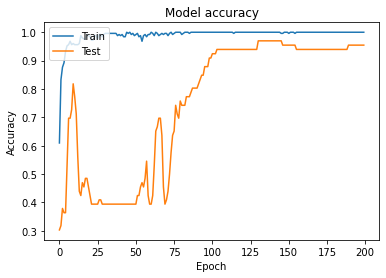

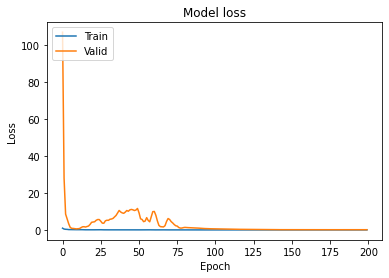

In [31]:
# Plot the accuracy values of training and testing sets
plt.plot(history_ResNet_v1.history['accuracy'])
plt.plot(history_ResNet_v1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the loss values for training and testing sets
plt.plot(history_ResNet_v1.history['loss']) 
plt.plot(history_ResNet_v1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

### 3.2 ResNet Version 2
In this part, we simply build a ResNet version 2 model with 3 stacks and depth = 29. Batch size change to 32.

In [32]:
# Training hyper-parameters
batch_size = 32
epochs = 200
data_augmentation = True
num_classes = 3
subtract_pixel_mean = True

In [33]:
# Number of stacks
n = 3 # Zifeng Edited

# Model version
# Orig paper: version = 1 (ResNet v1), Improved ResNet: version = 2 (ResNet v2), 
version = 2

# Computed depth from supplied model parameter n

depth = n * 9 + 2

# Model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)

# Load the CIFAR10 data.
x_train, y_train, x_test, y_test = train_images, train_labels, test_images, test_labels

# Input image dimensions.
input_shape = x_train.shape[1:]

# SUBRATA added
from math import ceil
n_points = len(x_train)
steps_per_epoch = ceil(n_points / batch_size)

# If subtract pixel mean is enabled
if subtract_pixel_mean:
    x_train_mean = np.mean(x_train, axis = 0)
    x_train -= x_train_mean
    x_test -= x_train_mean

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# Convert class vectors to binary class matrices.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

x_train shape: (251, 128, 128, 1)
251 train samples
66 test samples
y_train shape: (251,)


In [34]:
def resnet_v2(input_shape, depth, num_classes = 3):
    """ResNet Version 2 Model builder [b]

    Stacks of (1 x 1)-(3 x 3)-(1 x 1) BN-ReLU-Conv2D or also known as
    bottleneck layer
    First shortcut connection per layer is 1 x 1 Conv2D.
    Second and onwards shortcut connection is identity.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filter maps is
    doubled. Within each stage, the layers have the same number filters and the
    same filter map sizes.
    Features maps sizes:
    conv1  : 32x32,  16
    stage 0: 32x32,  64
    stage 1: 16x16, 128
    stage 2:  8x8,  256

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 9 != 0:
        raise ValueError('depth should be 9n+2 (eg 56 or 110 in [b])')
    # Start model definition.
    num_filters_in = 16
    num_res_blocks = int((depth - 2) / 9)

    inputs = Input(shape=input_shape)
    # v2 performs Conv2D with BN-ReLU on input before splitting into 2 paths
    x = resnet_layer(inputs=inputs,
                     num_filters=num_filters_in,
                     conv_first=True)

    # Instantiate the stack of residual units
    for stage in range(3):
        for res_block in range(num_res_blocks):
            activation = 'relu'
            batch_normalization = True
            strides = 1
            if stage == 0:
                num_filters_out = num_filters_in * 4
                if res_block == 0:  # first layer and first stage
                    activation = None
                    batch_normalization = False
            else:
                num_filters_out = num_filters_in * 2
                if res_block == 0:  # first layer but not first stage
                    strides = 2    # downsample

            # bottleneck residual unit
            y = resnet_layer(inputs=x,
                             num_filters=num_filters_in,
                             kernel_size=1,
                             strides=strides,
                             activation=activation,
                             batch_normalization=batch_normalization,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_in,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_out,
                             kernel_size=1,
                             conv_first=False)
            if res_block == 0:
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters_out,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])

        num_filters_in = num_filters_out

    # Add classifier on top.
    # v2 has BN-ReLU before Pooling
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size = 8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [35]:
K.clear_session() #  Clear the memory occupied by the previous model to prevent OOM

model_ResNet_v2 = resnet_v2(input_shape = input_shape, depth = depth)

model_ResNet_v2.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate=lr_schedule(epochs)),# Zifeng Edited
              metrics = ['accuracy'])
model_ResNet_v2.summary()
print(model_type)

# Prepare model model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'Covid_ResNet_modelv2.{epoch:03d}.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)


# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath = filepath,
                             monitor = 'val_acc',
                             verbose = 1,
                             save_best_only = True)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor = np.sqrt(0.1),
                               cooldown = 0,
                               patience = 5,
                               min_lr = 0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler]

# Run training, with or without data augmentation.
if not data_augmentation:
    print('Not using data augmentation.')
    # Zifeng Edited
    history_ResNet_v2 = model_ResNet_v2.fit(x_train, y_train,
              batch_size = batch_size,
              epochs = epochs,
              validation_data = (x_test, y_test),
              shuffle = True,
              callbacks = callbacks)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    # Zifeng Edited
    history_ResNet_v2 = model_ResNet_v2.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data = (x_test, y_test),
                        epochs = epochs, verbose = 1, workers = 10,
                        steps_per_epoch = steps_per_epoch, # SUBRATA added
                        callbacks = callbacks)

# Score trained model.
scores = model_ResNet_v2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Learning rate:  5e-07
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                       

8/8 [==============================] - 6s 412ms/step - loss: 1.3204 - accuracy: 0.6853 - val_loss: 3.3860 - val_accuracy: 0.4697 - lr: 0.0010
Learning rate:  0.001
Epoch 2/200
8/8 [==============================] - 2s 196ms/step - loss: 1.0019 - accuracy: 0.8406 - val_loss: 1.9398 - val_accuracy: 0.5758 - lr: 0.0010
Learning rate:  0.001
Epoch 3/200
8/8 [==============================] - 1s 176ms/step - loss: 0.8302 - accuracy: 0.9044 - val_loss: 1.6770 - val_accuracy: 0.5909 - lr: 0.0010
Learning rate:  0.001
Epoch 4/200
8/8 [==============================] - 1s 180ms/step - loss: 0.7877 - accuracy: 0.9283 - val_loss: 1.9805 - val_accuracy: 0.4242 - lr: 0.0010
Learning rate:  0.001
Epoch 5/200
8/8 [==============================] - 1s 179ms/step - loss: 0.7761 - accuracy: 0.9522 - val_loss: 2.2330 - val_accuracy: 0.4394 - lr: 0.0010
Learning rate:  0.001
Epoch 6/200
8/8 [==============================] - 1s 173ms/step - loss: 0.7932 - accuracy: 0.9124 - val_loss: 2.4048 - val_accuracy

8/8 [==============================] - 1s 188ms/step - loss: 0.5305 - accuracy: 1.0000 - val_loss: 3.0318 - val_accuracy: 0.4394 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 26/200
8/8 [==============================] - 1s 173ms/step - loss: 0.5494 - accuracy: 0.9801 - val_loss: 2.8152 - val_accuracy: 0.4545 - lr: 0.0010
Learning rate:  0.001
Epoch 27/200
8/8 [==============================] - 1s 171ms/step - loss: 0.5319 - accuracy: 0.9761 - val_loss: 4.0862 - val_accuracy: 0.4242 - lr: 0.0010
Learning rate:  0.001
Epoch 28/200
8/8 [==============================] - 1s 176ms/step - loss: 0.5191 - accuracy: 0.9841 - val_loss: 3.3875 - val_accuracy: 0.4394 - lr: 0.0010
Learning rate:  0.001
Epoch 29/200
8/8 [==============================] - 1s 175ms/step - loss: 0.5298 - accuracy: 0.9841 - val_loss: 3.7644 - val_accuracy: 0.4091 - lr: 0.0010
Learning rate:  0.001
Epoch 30/200
8/8 [==============================] - 1s 171ms/step - loss: 0.5356 - accuracy: 0.9681 - val_loss: 3.3168 - val

Learning rate:  0.001
Epoch 50/200
8/8 [==============================] - 1s 173ms/step - loss: 0.4044 - accuracy: 0.9920 - val_loss: 1.4817 - val_accuracy: 0.6818 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 51/200
8/8 [==============================] - 1s 173ms/step - loss: 0.4029 - accuracy: 0.9880 - val_loss: 0.9985 - val_accuracy: 0.7576 - lr: 0.0010
Learning rate:  0.001
Epoch 52/200
8/8 [==============================] - 1s 172ms/step - loss: 0.3942 - accuracy: 0.9920 - val_loss: 0.8480 - val_accuracy: 0.8485 - lr: 0.0010
Learning rate:  0.001
Epoch 53/200
8/8 [==============================] - 1s 176ms/step - loss: 0.3857 - accuracy: 0.9960 - val_loss: 1.0624 - val_accuracy: 0.8333 - lr: 0.0010
Learning rate:  0.001
Epoch 54/200
8/8 [==============================] - 1s 173ms/step - loss: 0.3959 - accuracy: 0.9920 - val_loss: 1.3887 - val_accuracy: 0.7576 - lr: 0.0010
Learning rate:  0.001
Epoch 55/200
8/8 [==============================] - 1s 174ms/step - loss: 0.3792 - accura

8/8 [==============================] - 1s 173ms/step - loss: 0.2810 - accuracy: 1.0000 - val_loss: 0.3135 - val_accuracy: 0.9848 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 99/200
8/8 [==============================] - 1s 173ms/step - loss: 0.2838 - accuracy: 1.0000 - val_loss: 0.3154 - val_accuracy: 0.9848 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 100/200
8/8 [==============================] - 1s 172ms/step - loss: 0.2819 - accuracy: 1.0000 - val_loss: 0.3137 - val_accuracy: 0.9848 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 101/200
8/8 [==============================] - 1s 173ms/step - loss: 0.2805 - accuracy: 1.0000 - val_loss: 0.3119 - val_accuracy: 0.9848 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 102/200
8/8 [==============================] - 1s 173ms/step - loss: 0.2855 - accuracy: 0.9960 - val_loss: 0.3093 - val_accuracy: 0.9848 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 103/200
8/8 [==============================] - 1s 173ms/step - loss: 0.2799 - accuracy: 1.0000

8/8 [==============================] - 1s 173ms/step - loss: 0.2737 - accuracy: 1.0000 - val_loss: 0.3038 - val_accuracy: 0.9848 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 147/200
8/8 [==============================] - 1s 175ms/step - loss: 0.2711 - accuracy: 1.0000 - val_loss: 0.3037 - val_accuracy: 0.9848 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 148/200
8/8 [==============================] - 1s 170ms/step - loss: 0.2710 - accuracy: 1.0000 - val_loss: 0.3032 - val_accuracy: 0.9848 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 149/200
8/8 [==============================] - 1s 172ms/step - loss: 0.2707 - accuracy: 1.0000 - val_loss: 0.3026 - val_accuracy: 0.9848 - lr: 3.1623e-06
Learning rate:  1e-05
Epoch 150/200
8/8 [==============================] - 1s 184ms/step - loss: 0.2720 - accuracy: 1.0000 - val_loss: 0.3023 - val_accuracy: 0.9848 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 151/200
8/8 [==============================] - 2s 194ms/step - loss: 0.2709 - accuracy: 1.0000 - v

8/8 [==============================] - 1s 173ms/step - loss: 0.2703 - accuracy: 1.0000 - val_loss: 0.2922 - val_accuracy: 0.9848 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 195/200
8/8 [==============================] - 1s 173ms/step - loss: 0.2712 - accuracy: 1.0000 - val_loss: 0.2923 - val_accuracy: 0.9848 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 196/200
8/8 [==============================] - 1s 173ms/step - loss: 0.2701 - accuracy: 1.0000 - val_loss: 0.2920 - val_accuracy: 0.9848 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 197/200
8/8 [==============================] - 1s 172ms/step - loss: 0.2697 - accuracy: 1.0000 - val_loss: 0.2918 - val_accuracy: 0.9848 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 198/200
8/8 [==============================] - 1s 172ms/step - loss: 0.2742 - accuracy: 0.9960 - val_loss: 0.2918 - val_accuracy: 0.9848 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 199/200
8/8 [==============================] - 1s 176ms/step - loss: 0.2706 - accuracy: 1.0000 - v

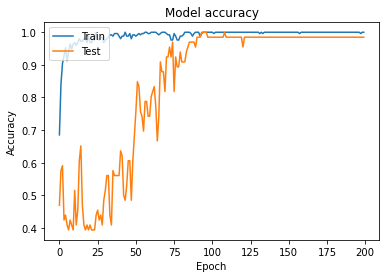

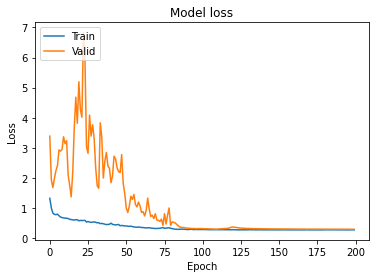

In [36]:
# Plot the accuracy values of training and testing sets
plt.plot(history_ResNet_v2.history['accuracy'])
plt.plot(history_ResNet_v2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the loss values for training and testing sets
plt.plot(history_ResNet_v2.history['loss']) 
plt.plot(history_ResNet_v2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [37]:
K.clear_session()

### 3.3 Using a pretrained model
In this part, we are going to use a pretrained model. Before that, we have to know that all the pretrained model can only deal with RGB 3 channel images. But our images are greyscale images which just have 1 channel. So we have to convert our greyscale images to RGB 3 channel images.

In [38]:
def expand_greyscale_image_channels(grey_image):
    grey_image_arr = np.array(grey_image)
    grey_image_arr_3_channel = grey_image_arr.repeat(3, axis = -1)
    return grey_image_arr_3_channel

In [39]:
x_train_3 = expand_greyscale_image_channels(x_train)
x_test_3 = expand_greyscale_image_channels(x_test)

In [40]:
x_train_3.shape

(251, 128, 128, 3)

In [41]:
y_train.shape

(251, 3)

In [42]:
x_test_3.shape

(66, 128, 128, 3)

In [43]:
y_test.shape

(66, 3)

In [44]:
# Training hyper-parameters
batch_size = 32
epochs = 200
data_augmentation = True
num_classes = 3

In [45]:
K.clear_session()
resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet101(# Let try ResNet101
                    include_top = False,
                    input_shape = x_train_3.shape[1:],
                    pooling = 'max',
                    classes = 3,
                    weights = 'imagenet')

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(num_classes, activation = 'softmax'))

In [46]:
resnet_model.compile(optimizer = Adam(learning_rate = 0.0005), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [47]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 2048)              42658176  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 43,708,803
Trainable params: 43,603,459
Non-trainable params: 105,344
_________________________________________________________________


In [48]:
# Run training, with or without data augmentation.
if not data_augmentation:
    print('Not using data augmentation.')
    # Zifeng Edited
    history_resnet_model = resnet_model.fit(x_train_3, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test_3, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train_3)

    # Fit the model on the batches generated by datagen.flow().
    # Zifeng Edited
    history_resnet_model = resnet_model.fit(datagen.flow(x_train_3, y_train, batch_size=batch_size),
                        validation_data=(x_test_3, y_test),
                        epochs=epochs, verbose=1, workers=10)

# Score trained model.
scores = resnet_model.evaluate(x_test_3, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Using real-time data augmentation.
Epoch 1/200
8/8 [==============================] - 9s 404ms/step - loss: 6.3812 - accuracy: 0.6096 - val_loss: 205.1742 - val_accuracy: 0.3030
Epoch 2/200
8/8 [==============================] - 1s 159ms/step - loss: 0.7626 - accuracy: 0.8486 - val_loss: 8248.9180 - val_accuracy: 0.3939
Epoch 3/200
8/8 [==============================] - 1s 155ms/step - loss: 0.1621 - accuracy: 0.9283 - val_loss: 135.2980 - val_accuracy: 0.3939
Epoch 4/200
8/8 [==============================] - 1s 155ms/step - loss: 0.5330 - accuracy: 0.9084 - val_loss: 35014.4688 - val_accuracy: 0.3939
Epoch 5/200
8/8 [==============================] - 1s 155ms/step - loss: 0.1784 - accuracy: 0.9323 - val_loss: 229712.0469 - val_accuracy: 0.3030
Epoch 6/200
8/8 [==============================] - 1s 154ms/step - loss: 0.1047 - accuracy: 0.9562 - val_loss: 40710.8945 - val_accuracy: 0.3030
Epoch 7/200
8/8 [==============================] - 1s 153ms/step - loss: 0.0848 - accuracy: 0.9641 

Epoch 58/200
8/8 [==============================] - 1s 152ms/step - loss: 0.0473 - accuracy: 0.9920 - val_loss: 7.5264 - val_accuracy: 0.3030
Epoch 59/200
8/8 [==============================] - 1s 155ms/step - loss: 0.4322 - accuracy: 0.9761 - val_loss: 136.9398 - val_accuracy: 0.3030
Epoch 60/200
8/8 [==============================] - 1s 152ms/step - loss: 1.5408 - accuracy: 0.9323 - val_loss: 1.3088 - val_accuracy: 0.3030
Epoch 61/200
8/8 [==============================] - 1s 154ms/step - loss: 0.7980 - accuracy: 0.8606 - val_loss: 43244580864.0000 - val_accuracy: 0.3939
Epoch 62/200
8/8 [==============================] - 1s 152ms/step - loss: 0.4830 - accuracy: 0.8685 - val_loss: 62918607503360.0000 - val_accuracy: 0.3939
Epoch 63/200
8/8 [==============================] - 1s 153ms/step - loss: 0.3000 - accuracy: 0.9203 - val_loss: 8335839461376.0000 - val_accuracy: 0.3939
Epoch 64/200
8/8 [==============================] - 1s 153ms/step - loss: 0.2114 - accuracy: 0.9363 - val_loss:

8/8 [==============================] - 1s 160ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 79.5560 - val_accuracy: 0.4091
Epoch 115/200
8/8 [==============================] - 1s 161ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 39.3598 - val_accuracy: 0.4242
Epoch 116/200
8/8 [==============================] - 1s 168ms/step - loss: 0.0093 - accuracy: 0.9960 - val_loss: 20.9033 - val_accuracy: 0.4394
Epoch 117/200
8/8 [==============================] - 1s 161ms/step - loss: 0.0113 - accuracy: 0.9960 - val_loss: 16.3051 - val_accuracy: 0.4394
Epoch 118/200
8/8 [==============================] - 1s 169ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 12.1815 - val_accuracy: 0.4394
Epoch 119/200
8/8 [==============================] - 1s 155ms/step - loss: 0.0093 - accuracy: 0.9920 - val_loss: 7.7152 - val_accuracy: 0.4545
Epoch 120/200
8/8 [==============================] - 1s 154ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 4.7000 - val_accuracy: 0.5152
Epoch 12

8/8 [==============================] - 1s 157ms/step - loss: 3.1160e-04 - accuracy: 1.0000 - val_loss: 0.5913 - val_accuracy: 0.8788
Epoch 172/200
8/8 [==============================] - 1s 168ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.4931 - val_accuracy: 0.9242
Epoch 173/200
8/8 [==============================] - 1s 154ms/step - loss: 1.8321e-04 - accuracy: 1.0000 - val_loss: 0.4336 - val_accuracy: 0.9242
Epoch 174/200
8/8 [==============================] - 1s 156ms/step - loss: 0.0168 - accuracy: 0.9960 - val_loss: 0.3585 - val_accuracy: 0.9242
Epoch 175/200
8/8 [==============================] - 1s 170ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1860 - val_accuracy: 0.9394
Epoch 176/200
8/8 [==============================] - 1s 162ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.1876 - val_accuracy: 0.9394
Epoch 177/200
8/8 [==============================] - 1s 166ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1956 - val_accuracy: 0.9394
Epoch

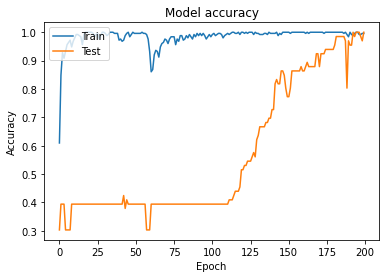

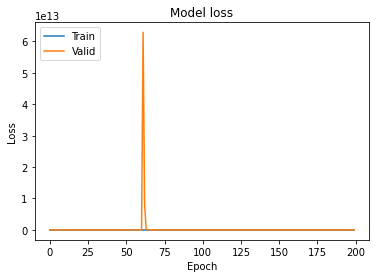

In [49]:
# Plot the accuracy values of training and testing sets
plt.plot(history_resnet_model.history['accuracy'])
plt.plot(history_resnet_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the loss values for training and testing sets
plt.plot(history_resnet_model.history['loss']) 
plt.plot(history_resnet_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()